In [6]:
#from numpy import zeros, cos, outer, sin, sqrt, pi
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex
from torch import tensor
from sympy.physics.quantum import InnerProduct, OuterProduct
from sympy.physics.quantum import TensorProduct, Dagger

theta = Symbol('theta',real=True, positive=True)
phi = Symbol('phi',real=True, positive=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)

def general_state(theta, phi):
    state = Matrix([[cos(theta/2), exp(1j*phi)*sin(theta/2)]])
    target_op = Dagger(state)*state
    return Matrix(target_op)

ket0=Matrix([[1,0],[0,0]])
ket1=Matrix([[0,0],[0,1]])


psi_a = general_state(theta, phi)
#psi_a = general_state(pi/2, 0)
psi_a

#PsiAB = OuterProduct(e,ket0)+OuterProduct(f,ket1)
#PsiAB

Matrix([
[                          cos(theta/2)**2, exp(1.0*I*phi)*sin(theta/2)*cos(theta/2)],
[exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2),                          sin(theta/2)**2]])

In [31]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex
from sympy.physics.quantum import InnerProduct
from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
theta = Symbol('theta',real=True, positive=True)
phi = Symbol('phi',real=True, positive=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)

def rhoAB_bpf(theta, phi, p):
    psi_a = general_state(theta, phi)
    ket0 = Matrix([[1,0],[0,0]])
    ket1 = Matrix([[0,0],[0,1]])
    
    k0 = Matrix([[sqrt(1-p),0],[0,sqrt(1-p)]])
    k1 = Matrix([[0, 1j*sqrt(p)],[1j*sqrt(p), 0]])
    
    a = TensorProduct(k0*psi_a,ket0)
    b = TensorProduct(k1*psi_a,ket1)
    PsiAB = a+b
    return PsiAB

a = rhoAB_bpf(pi/2, 0, 0.5)
b = np.array(a)
print(b)


[[0.353553390593274 0 0.353553390593274 0]
 [0 0.353553390593274*I 0 0.353553390593274*I]
 [0.353553390593274 0 0.353553390593274 0]
 [0 0.353553390593274*I 0 0.353553390593274*I]]


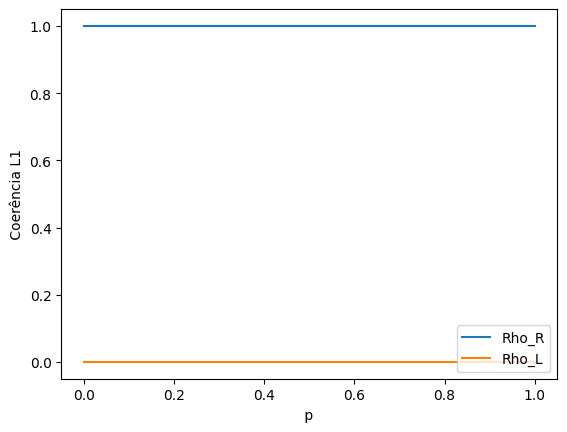

In [174]:
from numpy import linspace
import matplotlib.pyplot as plt
import numpy as np 
import math


def coh_l1(rho):  # normalized to [0,1]
    d = rho.shape[0]
    coh = 0.0
    for j in range(0, d-1):
        for k in range(j+1, d):
            coh += math.sqrt((rho[j][k].real)**2.0 + (rho[j][k].imag)**2.0)
    return 2.0*coh/(d-1)
#from theoric.theoric_tools import *
# theoric plot
#def plot_test(rho):
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

list_gamma = linspace(0,1,10)
list_gamma = [0]
list_p = linspace(0,1,50)

coerencias_R = []
coerencias_L = []
#for g in list_gamma:
for p in list_p:
    rho = rhoAB_bpf(pi/2, 0, p)

    rho_R = pTraceR_num(2,2,rho)
    rho_L = pTraceL_num(2,2,rho)
    coh_R = coh_l1(rho_R)
    coh_L = coh_l1(rho_L)
    coerencias_R.append(coh_R)
    coerencias_L.append(coh_L)
plt.plot(list_p,coerencias_R,label='Rho_R')
plt.plot(list_p,coerencias_L,label='Rho_L')
plt.xlabel(' p ')
plt.ylabel(' Coerência L1 ')
plt.legend(loc=4)
plt.show()



In [21]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex
from sympy.physics.quantum import InnerProduct, OuterProduct
from sympy.physics.quantum import TensorProduct, Dagger

theta = Symbol('theta',real=True, positive=True)
phi = Symbol('phi',real=True, positive=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)
# BitPhaseflip
k0 = Matrix([[sqrt(p),0],[0,sqrt(p)]])
k1 = Matrix([[0, 1j*sqrt(1-p)],[1j*sqrt(1-p), 0]])
k1

Matrix([
[                0, 1.0*I*sqrt(1 - p)],
[1.0*I*sqrt(1 - p),                 0]])

In [28]:
psi_a = general_state(theta, phi)
a =TensorProduct(k0*psi_a,ket0)
b =TensorProduct(k1*psi_a,ket1)

print_latex(b)

\left[\begin{matrix}0 & 0 & 0 & 0\\0 & 1.0 i \sqrt{1 - p} e^{- 1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & 0 & 1.0 i \sqrt{1 - p} \sin^{2}{\left(\frac{\theta}{2} \right)}\\0 & 0 & 0 & 0\\0 & 1.0 i \sqrt{1 - p} \cos^{2}{\left(\frac{\theta}{2} \right)} & 0 & 1.0 i \sqrt{1 - p} e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)}\end{matrix}\right]


In [27]:
'''Calc '''
k0 = Matrix([[sqrt(p),0],[0,sqrt(p)]])
k1 = Matrix([[0, 1j*sqrt(1-p)],[1j*sqrt(1-p), 0]])
ket0 = Matrix([[1,0],[0,0]])
ket1 = Matrix([[0,0],[0,1]])

psi_a = general_state(theta, phi)


a =TensorProduct(k0*psi_a,ket0)
b =TensorProduct(k1*psi_a,ket1)
PsiAB = a+b
PsiAB


Matrix([
[                          sqrt(p)*cos(theta/2)**2,                                                           0, sqrt(p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2),                                                          0],
[                                                0, 1.0*I*sqrt(1 - p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2),                                                0,                          1.0*I*sqrt(1 - p)*sin(theta/2)**2],
[sqrt(p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2),                                                           0,                          sqrt(p)*sin(theta/2)**2,                                                          0],
[                                                0,                           1.0*I*sqrt(1 - p)*cos(theta/2)**2,                                                0, 1.0*I*sqrt(1 - p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2)]])

In [19]:
PsiAB = rhoAB_bpf(pi/2, 0 , 0.2)
PsiAB

Matrix([
[0.447213595499958,                   0, 0.447213595499958,                   0],
[                0, 0.223606797749979*I,                 0, 0.223606797749979*I],
[0.447213595499958,                   0, 0.447213595499958,                   0],
[                0, 0.223606797749979*I,                 0, 0.223606797749979*I]])

In [132]:
#TensorProduct(e,ket0)
e*ket0.T

ShapeError: Matrix size mismatch: (2, 2) * (1, 2).

In [28]:
ket0=Matrix([[1,0]])
ket1=Matrix([[0,1]])
ket1

Matrix([[0, 1]])

In [21]:
k0 = Matrix([[sqrt(1-p),0],[0,sqrt(1-p)]])
k0

Matrix([
[sqrt(1 - p),           0],
[          0, sqrt(1 - p)]])

In [24]:
k1 = Matrix([[0, 1j*sqrt(p)],[1j*sqrt(p), 0]])
k1

Matrix([
[            0, 1.0*I*sqrt(p)],
[1.0*I*sqrt(p),             0]])

In [32]:
a = TensorProduct(k0*result,ket0)
a

Matrix([
[                          sqrt(1 - p)*cos(theta/2)**2, 0, sqrt(1 - p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2), 0],
[sqrt(1 - p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2), 0,                          sqrt(1 - p)*sin(theta/2)**2, 0]])

In [33]:
b = TensorProduct(k1*result,ket1)
b

Matrix([
[0, 1.0*I*sqrt(p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2), 0,                          1.0*I*sqrt(p)*sin(theta/2)**2],
[0,                           1.0*I*sqrt(p)*cos(theta/2)**2, 0, 1.0*I*sqrt(p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2)]])

In [34]:
PsiAB = a+b
PsiAB

Matrix([
[                          sqrt(1 - p)*cos(theta/2)**2, 1.0*I*sqrt(p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2), sqrt(1 - p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2),                          1.0*I*sqrt(p)*sin(theta/2)**2],
[sqrt(1 - p)*exp(-1.0*I*phi)*sin(theta/2)*cos(theta/2),                           1.0*I*sqrt(p)*cos(theta/2)**2,                          sqrt(1 - p)*sin(theta/2)**2, 1.0*I*sqrt(p)*exp(1.0*I*phi)*sin(theta/2)*cos(theta/2)]])